# Preprocess [global wildfire dataset](https://www.nature.com/articles/s41597-019-0312-2)
- Data source: data is available in [this PANGAEA repository](https://doi.pangaea.de/10.1594/PANGAEA.895835)

In [36]:
import numpy as np
import pandas as pd
import geopandas as gpd
import xarray as xr
from tqdm import tqdm
from shapely.ops import cascaded_union
import requests
import zipfile
import tarfile
import io
import os
import matplotlib.pyplot as plt

## Download data

In [27]:
base_url = 'http://hs.pangaea.de/Maps/MCD64A1_burnt-areas/'
base_filename = 'MODIS_BA_GLOBAL_1_'
local_path = '../data/MODIS_GWIS_Active_FireEvents'

years = np.arange(2017, 2018, 1).astype(np.str)
months = np.arange(1, 13, 1).astype(np.str)

if not os.path.isdir(local_path):
    os.mkdir(local_path)

for year in years:
    for month in months:
        filename = base_filename + month + '_' + year
        url = base_url + filename + '.zip'
        print(url)
        print('Downloading zip file')
        r = requests.get(url)
        z = zipfile.ZipFile(io.BytesIO(r.content))
        print('Extract zip file')
        z.extractall(path=local_path) # extract to folder
        print('Untar tar file')
        tar = tarfile.open(f"{local_path}/{filename+'.tar'}")
        tar.extractall(path=f'{local_path}/{filename}/')
        tar.close()
        print('Remove tar file')
        os.remove(f"{local_path}/{filename}.tar")

http://hs.pangaea.de/Maps/MCD64A1_burnt-areas/MODIS_BA_GLOBAL_1_1_2017.zip
Extract zip file
Untar tar file
Remove tar file
http://hs.pangaea.de/Maps/MCD64A1_burnt-areas/MODIS_BA_GLOBAL_1_2_2017.zip
Extract zip file
Untar tar file
Remove tar file
http://hs.pangaea.de/Maps/MCD64A1_burnt-areas/MODIS_BA_GLOBAL_1_3_2017.zip
Extract zip file
Untar tar file
Remove tar file
http://hs.pangaea.de/Maps/MCD64A1_burnt-areas/MODIS_BA_GLOBAL_1_4_2017.zip
Extract zip file
Untar tar file
Remove tar file
http://hs.pangaea.de/Maps/MCD64A1_burnt-areas/MODIS_BA_GLOBAL_1_5_2017.zip
Extract zip file
Untar tar file
Remove tar file
http://hs.pangaea.de/Maps/MCD64A1_burnt-areas/MODIS_BA_GLOBAL_1_6_2017.zip
Extract zip file
Untar tar file
Remove tar file
http://hs.pangaea.de/Maps/MCD64A1_burnt-areas/MODIS_BA_GLOBAL_1_7_2017.zip
Extract zip file
Untar tar file
Remove tar file
http://hs.pangaea.de/Maps/MCD64A1_burnt-areas/MODIS_BA_GLOBAL_1_8_2017.zip
Extract zip file
Untar tar file
Remove tar file
http://hs.pangae

**Concatenate data**

In [76]:
base_filename = 'MODIS_BA_GLOBAL_1_'
local_path = '../data/MODIS_GWIS_Active_FireEvents'

years = np.arange(2001, 2018, 1).astype(np.str)
months = np.arange(1, 13, 1).astype(np.str)

n = 0
for year in years:
    print(f'{year}:')
    for month in months:
        filename = base_filename + month + '_' + year
        gdf = gpd.read_file(f'{local_path}/{filename}/{filename}.shp', bbox = [-180, 18, -54, 72])
        gdf = gdf[gdf['Type'] == 'FinalArea']
        if n == 0:
            gdf_all = gdf
        else:
            gdf_all = pd.concat([gdf_all, gdf])
        n += 1

2001:
2002:
2003:
2004:
2005:
2006:
2007:
2008:
2009:
2010:
2011:
2012:
2013:
2014:
2015:
2016:
2017:


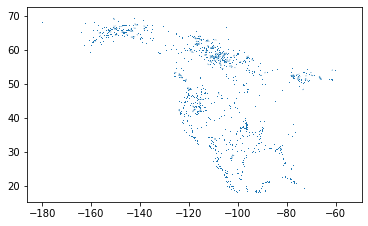

In [59]:
gdf_all.plot()

**Save wildfire GeoDataFrame**

In [79]:
gdf_all.iloc[256:].to_file('../data/MODIS_GWIS_Active_FireEvents/wildfires/wildfires.shp')